In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

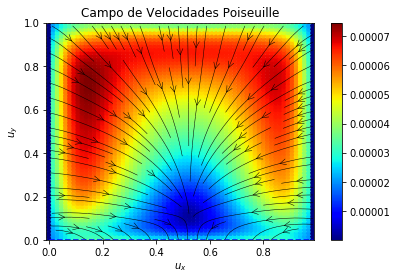

In [53]:
ux = np.loadtxt('vx.dat', unpack = True)
uy = np.loadtxt('vy.dat', unpack = True)
#uz = np.transpose(np.loadtxt('vz.dat', unpack = True))
x = np.loadtxt('x.dat', unpack = True)
y = np.loadtxt('y.dat', unpack = True)
#z = np.transpose(np.loadtxt('z.dat', unpack = True))
rho = np.loadtxt('rho.dat', unpack = True)

np.shape(ux)

plt.figure()
plt.title("Campo de Velocidades Poiseuille")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux, uy)
plt.xlim(-0.01,0.99)
plt.ylim(0,1)
Q = plt.quiver(x, y, ux,uy, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x, y, ux, uy, color="k", linewidth=0.5,density=1.0, arrowstyle='->', arrowsize=1.5)
plt.plot(x,uy[32,:],"b--")


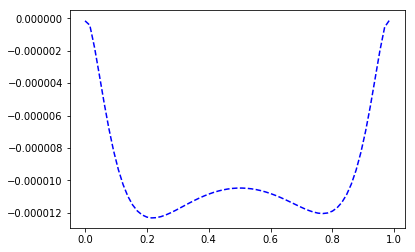

In [60]:
plt.plot(x,uy[3,:],"b--")

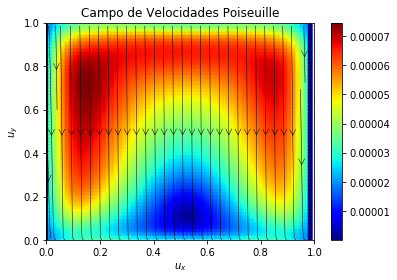

In [63]:
Bx = np.loadtxt('Bx.dat', unpack = True)
By = np.loadtxt('By.dat', unpack = True)
#uz = np.transpose(np.loadtxt('vz.dat', unpack = True))
x = np.loadtxt('x.dat', unpack = True)
y = np.loadtxt('y.dat', unpack = True)
#z = np.transpose(np.loadtxt('z.dat', unpack = True))
rho = np.loadtxt('rho.dat', unpack = True)

np.shape(ux)

plt.figure()
plt.title("Campo de Velocidades Poiseuille")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux, uy)
plt.xlim(0,1)
plt.ylim(0,1)
Q = plt.quiver(x, y, Bx,By, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x, y, Bx, By, color="k", linewidth=0.5,density=1.0, arrowstyle='->', arrowsize=1.5)



In [66]:


def PoiseuilleGrafica(udat,vdat,xdat,ydat,rhodat,pasos):
    uesc = 1.0#dx/dt
    u = np.transpose(np.loadtxt(udat, unpack = True))
    v = np.transpose(np.loadtxt(vdat, unpack = True))
    x = np.transpose(np.loadtxt(xdat, unpack = True))
    y = np.transpose(np.loadtxt(ydat, unpack = True))
    rho = np.transpose(np.loadtxt(rhodat, unpack = True))
    X = np.linspace(0,1,50)

    f, axarr = plt.subplots(1,2, figsize=(24,6))
    st = f.suptitle("Flujo de Pouseuille $\\tau = 0.6$", fontsize=25)
    st.set_y(1.0)

    M= np.hypot(u, v)
    axarr[0].streamplot(x,y,u,v, color="k",linewidth=0.8,density=0.4, arrowstyle='->', arrowsize=1.5)
    im=axarr[0].quiver(x, y,u,v, M , cmap=plt.cm.jet,width=0.022,scale=1/0.1)
    axarr[0].set_title(str(pasos),fontsize = 20)
    axarr[0].set_xlim(-0.01,1)
    axarr[0].set_xlabel("$x[m]$",fontsize = 20)
    axarr[0].set_ylabel("$y[m]$",fontsize = 20)
    axarr[0].tick_params(axis="x", labelsize=20)
    axarr[0].tick_params(axis="y", labelsize=20)
    
    axarr[1].plot(x,u[32,:],"b", label = "Simulacion")
    #axarr[1].plot(X,uesc*uy(X,nul,gl,Pl),"r+", label = "Teorica")
    axarr[1].set_ylim(-0.1*uesc,0)
    axarr[1].legend()
    axarr[1].grid(True)
    axarr[1].set_title('Perfil de Velocidad',fontsize = 20,y=1.0)
    axarr[1].set_xlabel("$x[m]$",fontsize = 20)
    axarr[1].set_ylabel("$v[m/s]$",fontsize =20)
    axarr[1].tick_params(axis="x", labelsize=20)
    axarr[1].tick_params(axis="y", labelsize=20)
    
    cbar = f.colorbar(im, ax=axarr, shrink = 1.0)
    cbar.set_label('$v[m/s]$',fontsize =20)
    cbar.ax.tick_params(labelsize=20)



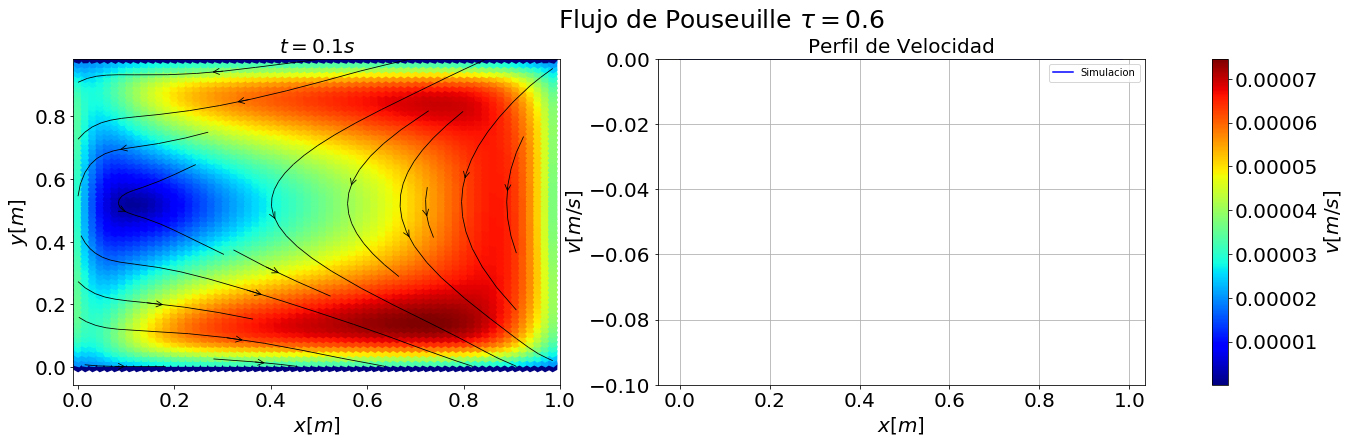

In [67]:
PoiseuilleGrafica("vx.dat","vy.dat","x.dat","y.dat","rho.dat","$t = 0.1 s$")